In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'sample_submission.csv']


In [75]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
X_train = pd.read_csv("../input/train.csv") 
X_test = pd.read_csv("../input/test.csv")

In [76]:
X_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
Y_train = X_train["label"]
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [78]:
# Drop 'label' column
X_train = X_train.drop(labels = ["label"],axis = 1) 

In [79]:
X_train = X_train / 255.0
test = X_test / 255.0

In [80]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [81]:
#X_train

In [82]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [83]:
random_seed = 2

In [84]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state=random_seed)

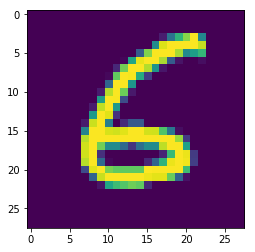

In [85]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [86]:
from __future__ import print_function

In [157]:
model = Sequential()
batch_size = 64
num_classes = 10
epochs = 25

In [158]:
model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(64, 5, activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Conv2D(128, 5, activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


In [159]:
model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.Adadelta(), metrics=['accuracy'])

In [160]:
X_train.shape

(35700, 28, 28, 1)

In [161]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 6, 6, 128)         204928    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 3, 3, 128)         0         
__________

In [162]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, 
                            height_shift_range = 0.1)

datagen.fit(X_train)

In [163]:
# datagen

In [164]:
X_train.shape

(35700, 28, 28, 1)

In [165]:
# model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs)
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                   steps_per_epoch = X_train.shape[0] // batch_size,
                   epochs = epochs, validation_data = (X_val, Y_val))

Epoch 1/25
557/557 [==============================] - 11s 19ms/step - loss: 0.4185 - acc: 0.8640 - val_loss: 0.0644 - val_acc: 0.9814
Epoch 2/25
557/557 [==============================] - 9s 16ms/step - loss: 0.1121 - acc: 0.9671 - val_loss: 0.0424 - val_acc: 0.9859
Epoch 3/25
557/557 [==============================] - 9s 16ms/step - loss: 0.0816 - acc: 0.9753 - val_loss: 0.0413 - val_acc: 0.9884
Epoch 4/25
557/557 [==============================] - 9s 16ms/step - loss: 0.0633 - acc: 0.9803 - val_loss: 0.0282 - val_acc: 0.9905
Epoch 5/25
557/557 [==============================] - 9s 15ms/step - loss: 0.0522 - acc: 0.9843 - val_loss: 0.0308 - val_acc: 0.9913
Epoch 6/25
557/557 [==============================] - 9s 16ms/step - loss: 0.0498 - acc: 0.9852 - val_loss: 0.0205 - val_acc: 0.9932
Epoch 7/25
557/557 [==============================] - 9s 16ms/step - loss: 0.0456 - acc: 0.9866 - val_loss: 0.0286 - val_acc: 0.9922
Epoch 8/25
557/557 [==============================] - 9s 17ms/step -

In [68]:
score = model.evaluate(X_val, Y_val)

6300/6300 [==============================] - 0s 68us/step


In [69]:
score

[0.019987455203702823, 0.9941269842026725]

In [70]:
predicto = model.predict(test)

In [71]:
# select the indix with the maximum probability
results = np.argmax(predicto,axis = 1)

results = pd.Series(results,name="Label")

In [72]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [73]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
